# (연습) 1차원 데이터 시각화

**준비사항**

Pandas 라이브러리를 pd라는 이름으로 불러온다

In [1]:
import pandas as pd

`matplotlib.pyplot`은 막대그래프, 히스토그램, 산점도 등 데이터를 그래프로 시각화할 때 필요한
다양한 함수를 제공하는 모듈이다.

In [2]:
import matplotlib.pyplot as plt

# 그래프 설정
plt.rc('figure', figsize=(10, 6))  # 그래프 크기 지정

**데이터 저장소 디렉토리**

코드에 사용되는 데이터 저장소의 기본 디렉토리를 지정한다.

In [3]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**문제 1**

기본 데이터 저장소에 있는 `sc_weir.csv` 파일은
광주광력시에서부터 전라남도 나주를 거쳐 서해까지 이어지는 영산강에 설치된 승촌보에서 측정한 
두 종류의 데이터를 담고 있다.

- `Chl-a`: 녹조 발생의 주요 요인인 클로로필-A의 수치 100개
- `Discharge`: 보에서 방출되는 시간당 방류량 수치 100개

클로로필-A 농도가 높을 수록 수질(water quality)이 나빠지며, 방류량이 많을 수록 클로로필-A 농도는 일반적으로 떨어지며,
두 데이터 사이의 상관관계를 확인하기 위해 수집되었다.

In [4]:
sc_weir_df = pd.read_csv(data_url+'sc_weir.csv')
sc_weir_df

,Chl-a,Discharge
0,51,25
1,51,25
2,53,24
3,53,24
4,54,22
...,...,...
95,122,9
96,122,9
97,124,49
98,125,9


클로로필-A 데이터에 포함된 값들의 빈도를 막대그래프로 그려라.

답:

- 넘파이 활용

In [5]:
chl_a_arr = sc_weir_df["Chl-a"].values

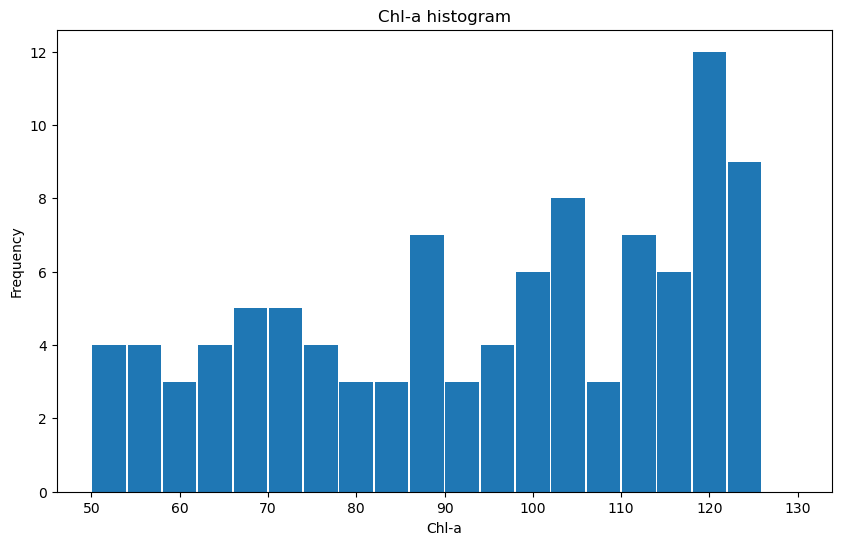

In [6]:
freq, bin_edges, _ = plt.hist(chl_a_arr, 
                              bins=20, 
                              range=(50, 130), 
                              rwidth=0.95)

plt.xticks(range(50, 131, 10))
# plt.yticks(range(0, 11))
plt.xlabel("Chl-a")
plt.ylabel("Frequency")
plt.title("Chl-a histogram")

plt.show()

- 시리즈 활용

In [7]:
chl_a_ser = sc_weir_df["Chl-a"]

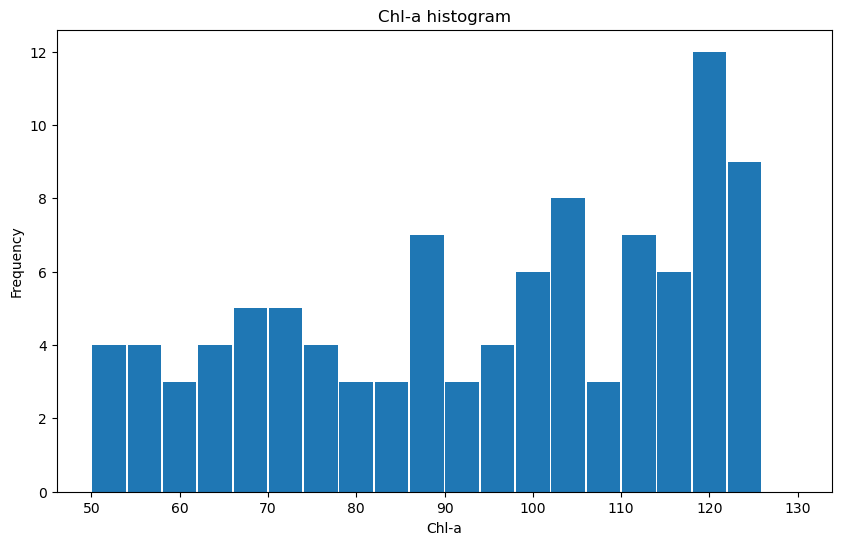

In [8]:
chl_a_ser.hist(bins=20,
               range=(50, 130), 
               rwidth=0.95,
               grid=False)

plt.xticks(range(50, 131, 10))
# plt.yticks(range(0, 11))
plt.xlabel("Chl-a")
plt.ylabel("Frequency")
plt.title("Chl-a histogram")

plt.show()

- 데이터프레임 활용

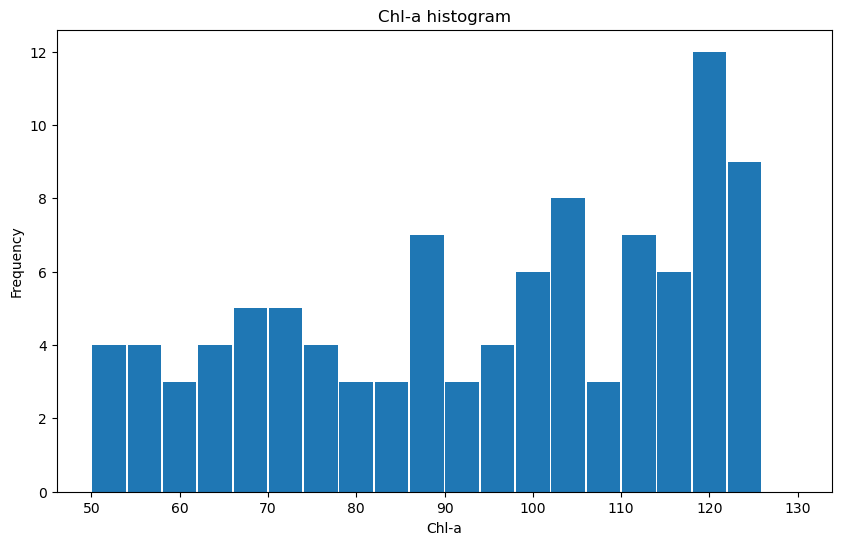

In [9]:
sc_weir_df.hist(column='Chl-a',
                bins=20,
                range=(50, 130), 
                rwidth=0.95,
                grid=False)

plt.xticks(range(50, 131, 10))
# plt.yticks(range(0, 11))
plt.xlabel("Chl-a")
plt.ylabel("Frequency")
plt.title("Chl-a histogram")

plt.show()

**문제 2**

아래 링크를 이용하여 matplotlib.pyplot 라이브러리의 기초 활용법을 알아본다.

- 참고 문서: [(코딩알지) matplotlib.pyplot 1부](https://codingalzi.github.io/datapy/visualization_1.html)

**문제 3**

기본 데이터 저장소에 있는 `california_housing.csv` 파일은 미국 캘리포니아 주의 주택 정보를 담고 있다.
먼저 위 파일의 내용을 데이터프레임으로 불러와서 `housing_df` 변수에 할당한다.

In [10]:
housing_df = pd.read_csv(data_url+'california_housing.csv')
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


(1) median_income 특성을 대상으로 히스토그램을 그려라.
단, 전체 구간의 크기는 특성값의 범위로 하며, 작은 구간의 개수는 적절하게 정한다.

- 시리즈 활용

In [11]:
median_income_df = housing_df.loc[:, 'median_income']
median_income_df

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

`bins` 기본값은 10

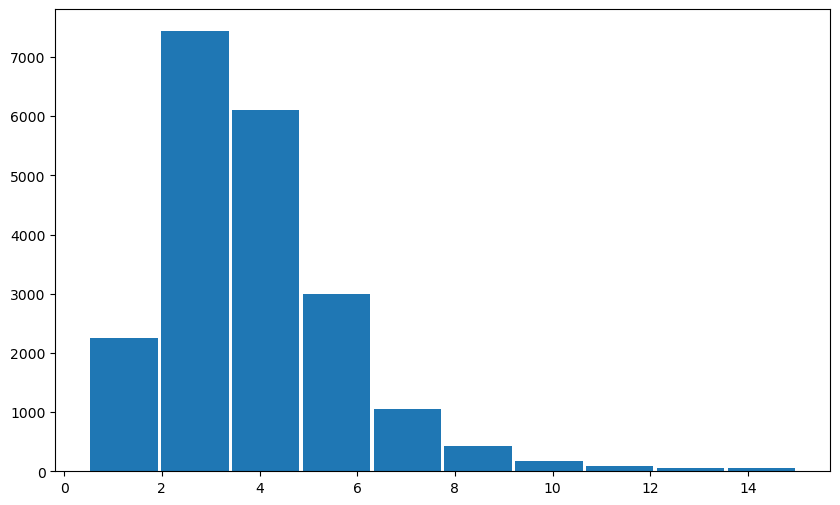

In [12]:
median_income_df.hist(rwidth=0.95,
                      grid=False)

plt.show()

`bins`를 20으로 할 때: 막대가 많아질 수록 구분하기 위해 `rwidth`는 더 작게 해야 함.

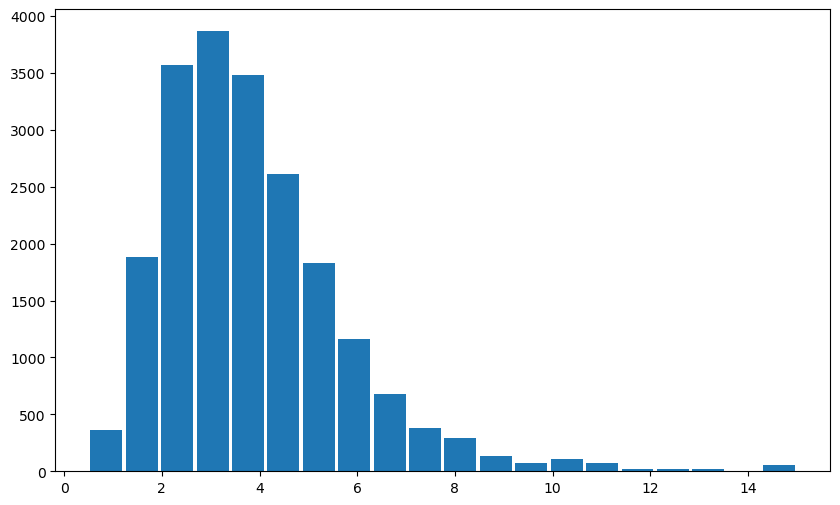

In [13]:
median_income_df.hist(bins=20,
                      rwidth=0.9,
                      grid=False)

plt.show()

- 데이터프레임 활용

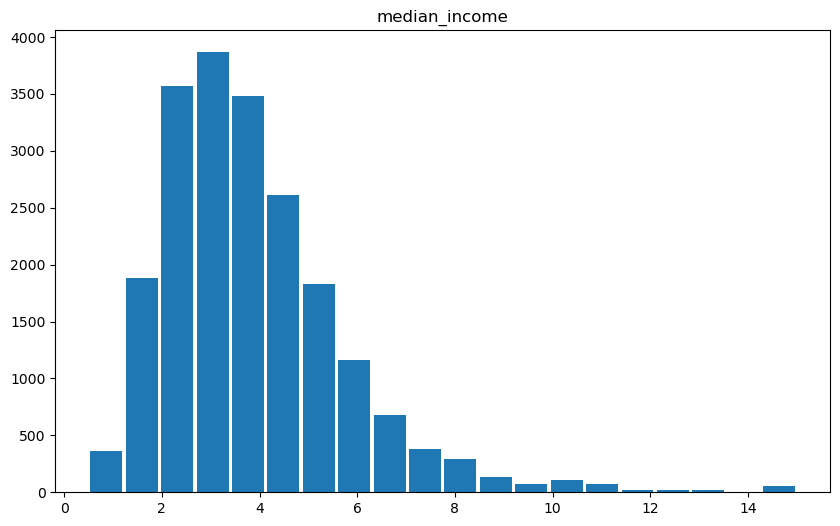

In [14]:
housing_df.hist(column='median_income', 
                bins=20,
                rwidth=0.9,
                grid=False)

plt.show()

(2) 히스토그램에 x-축의 레이블은 median_income으로, y-축의 레이블은 Frequency로, 
그래프의 타이틀은 California housing data로 지정한다.

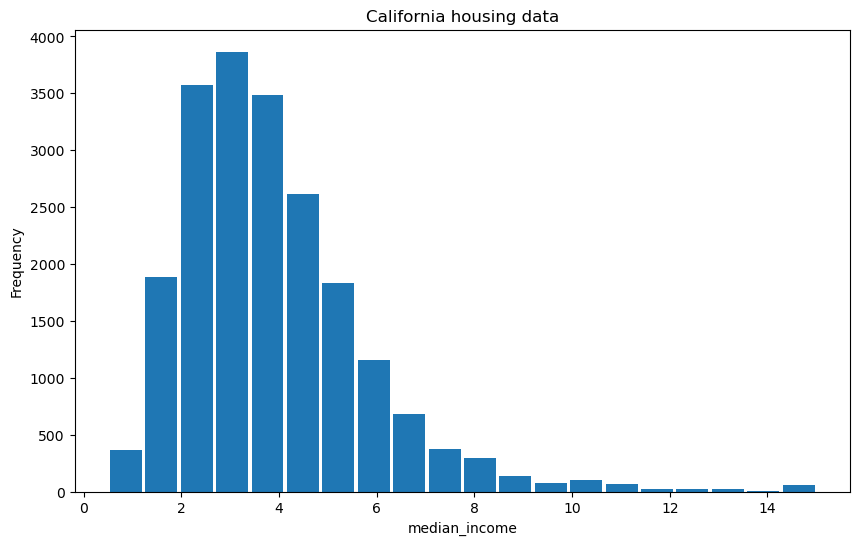

In [15]:
housing_df.hist(column='median_income', 
                bins=20,
                rwidth=0.9,
                grid=False)

plt.xlabel("median_income")
plt.ylabel("Frequency")
plt.title("California housing data")

plt.show()